In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("covid.csv",parse_dates=['Date'])
df[['Date','New Cases']].tail()

,Date,New Cases
32,2020-04-09,112
33,2020-04-10,94
34,2020-04-11,58
35,2020-04-12,139
36,2020-04-13,182


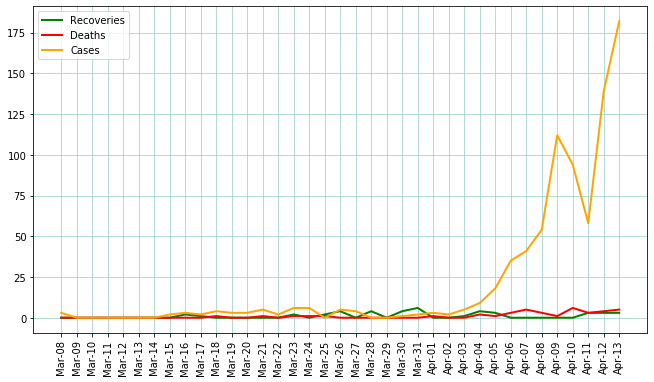

In [3]:
fig= plt.figure(figsize=(11,6))

Date=[date_obj.strftime('%b-%d') for date_obj in df['Date']]
NR=df['New Recoveries']
NC=df['New Cases']
ND=df['New Deaths']


plt.plot(Date,NR,linewidth=2,color="green",label="Recoveries")
plt.plot(Date,ND,linewidth=2,color="red",label="Deaths")
plt.plot(Date,NC,linewidth=2,color="orange",label="Cases")
plt.xticks(rotation=90)

plt.grid(color='#a1d1d0')
plt.legend()
plt.show()

In [10]:
active_cases=df['Total Cases'].max()-df['Total Deaths'].max()-df['Total Recoveries'].max()
exp_vals = [active_cases,df['Total Deaths'].max(),df['Total Recoveries'].max()]
exp_labels = ["Active Cases","Deaths","Recovered"]

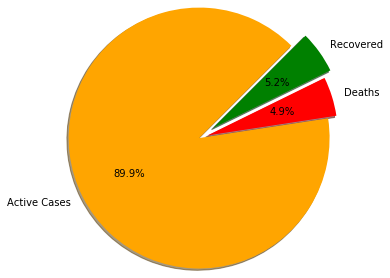

In [11]:
plt.axis("equal")
plt.pie(exp_vals,labels=exp_labels, shadow=True,colors=["orange","red","green"],
        autopct='%1.1f%%',radius=1.5,explode=[0,0.1,0.2],counterclock=True, startangle=45)

plt.savefig("piechart.png", bbox_inches="tight", pad_inches=1, transparent=True)
plt.show()
plt.close()